In [9]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
adj = pd.read_csv("./running_diff.csv", header=0)
labels = adj.columns.tolist()
A = adj.values

In [11]:
L = pd.read_csv("./running_diff.csv", header=0)
L = L.to_numpy()

L

array([[ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [28,  5,  3,  0,  0,  0, 18, 25, 23, 30, 21, 21, 20, 20, 16,  0,
         0,  0,  0,  0,  0,  4,  0,  0,  0,  0],
       [11, 14, 12,  8,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [21, 24, 22, 18,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [32, 28, 26, 28, 13,  3,  0,  6,  4,  8,  2,  3,  1,  1,  0,  0,
         0,  0,  0,  0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0, 

In [12]:
G = nx.DiGraph()
for i, u in enumerate(labels):
    for j, v in enumerate(labels):
        w = A[i, j]
        if w != 0:
            G.add_edge(u, v, weight=w)

In [13]:
def springRank(G, nodelist, alpha=0.1):

    A = nx.to_numpy_array(G, nodelist=nodelist, weight='weight')

    k_in = np.sum(A, axis=0)
    # k_in = np.zeros(len(A))

    # for i in range(A.shape[0]):
    #     total = 0
    #     for j in range(len(A[i])): 
    #         total += A[j][i] 
    #     k_in[i] = total
        



    k_out = np.sum(A, axis=1)
    # k_out = np.zeros(len(A))
    # for i in range(A.shape[0]):
    #     total = 0
    #     for j in range(len(A[i])): 
    #         total += A[i][j]
    #     k_out[i] = total


    new_sub = np.zeros(len(A))
    for i in range(len(A)):
        for j in range(len(A[i])):
            new_sub[i] += L[j][i]*(A[j][i] - A[i][j])
    

    Kin = np.diag(k_in)
    Kout = np.diag(k_out)


    sub = k_in - k_out

    M = Kout + Kin - (A + A.T) + alpha * np.identity(len(nodelist))
    b = (new_sub)

    s = np.linalg.solve(M, b)

    return dict(zip(nodelist, s))

In [14]:
alpha = 0.1
raw_scores = springRank(G, labels, alpha)
scores = np.array([ raw_scores[node] for node in labels ])
scores_norm = (scores - scores.min()) / (scores.max() - scores.min() + 1e-9)


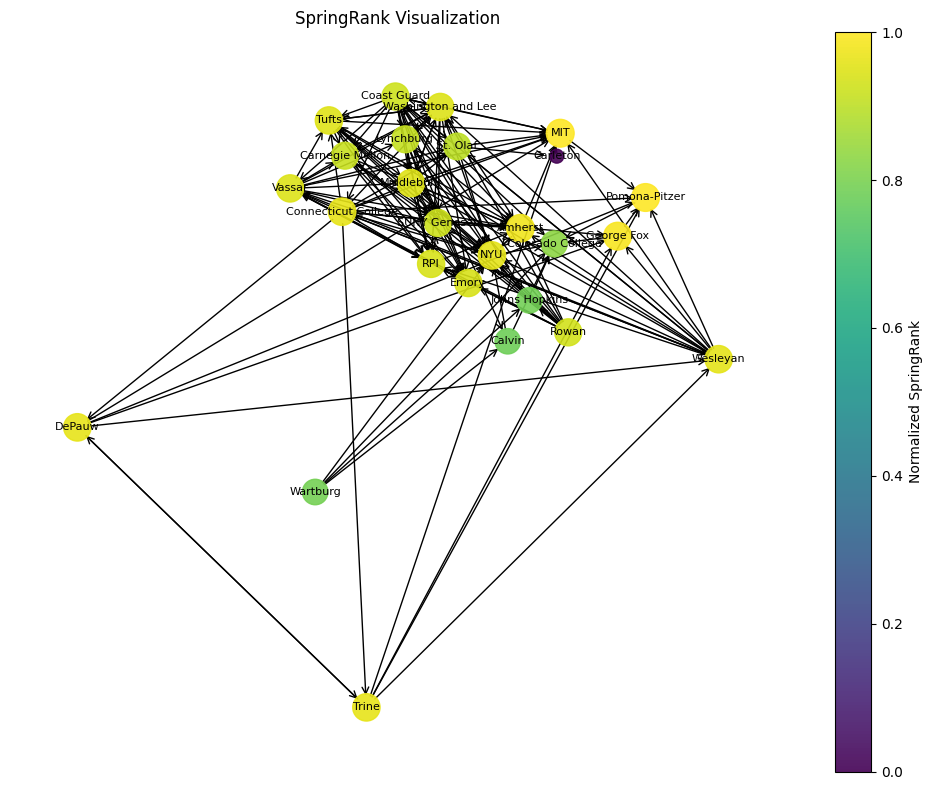

In [15]:
plt.figure(figsize=(10, 8))
pos = nx.kamada_kawai_layout(G, scale=2)
nodes = nx.draw_networkx_nodes(
    G, 
    pos,
    nodelist=labels,
    node_color=scores_norm,
    cmap=plt.cm.viridis,
    node_size=100 + 300 * scores_norm,
    alpha=0.9
)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=12, width=1)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.colorbar(nodes, label="Normalized SpringRank")
plt.title("SpringRank Visualization", fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()

In [19]:
pr = dict(zip(labels, scores_norm))

sorted_list = sorted(pr.items(), key=lambda x: x[1], reverse=True)

print("Ranked Schools:")

for i, (school, score) in enumerate(sorted_list, start=1):
    print(f"{i}. {school} - {score:.4f}")


Ranked Schools:
1. MIT - 1.0000
2. Pomona-Pitzer - 0.9969
3. George Fox - 0.9915
4. Amherst - 0.9768
5. DePauw - 0.9647
6. Connecticut College - 0.9635
7. Trine - 0.9611
8. NYU - 0.9595
9. Wesleyan - 0.9578
10. Middlebury - 0.9522
11. Tufts - 0.9506
12. Washington and Lee - 0.9473
13. Vassar - 0.9472
14. Emory - 0.9388
15. RPI - 0.9378
16. Rowan - 0.9301
17. Coast Guard - 0.9258
18. SUNY Geneseo - 0.9238
19. Carnegie Mellon - 0.9151
20. Lynchburg - 0.9126
21. St. Olaf - 0.8987
22. Colorado College - 0.8295
23. Wartburg - 0.7899
24. Johns Hopkins - 0.7880
25. Calvin - 0.7799
26. Carleton - 0.0000


In [17]:
# colorado_index = labels.index("Emory")
# sum(A[colorado_index, :])  # Sum of all incoming edges to Colorado College
losses = [ sum(A[i,:]) for i in range(A.shape[1]) ]
pr = dict(zip(labels, losses))
sorted_list = sorted(pr.items(), key=lambda x: x[1], reverse=False)

print("Num Losses")
for i, (school, score) in enumerate(sorted_list, start=1):
    print(f"{i}. {school} - {score:.4f}")



Num Losses
1. Colorado College - 0.0000
2. Carleton - 0.0000
3. Emory - 1.0000
4. MIT - 2.0000
5. Pomona-Pitzer - 2.0000
6. George Fox - 2.0000
7. NYU - 2.0000
8. Johns Hopkins - 4.0000
9. RPI - 4.0000
10. Amherst - 5.0000
11. Calvin - 6.0000
12. SUNY Geneseo - 6.0000
13. St. Olaf - 10.0000
14. Carnegie Mellon - 22.0000
15. Lynchburg - 27.0000
16. Wartburg - 33.0000
17. Middlebury - 36.0000
18. Tufts - 46.0000
19. Trine - 52.0000
20. Washington and Lee - 63.0000
21. Vassar - 81.0000
22. DePauw - 94.0000
23. Coast Guard - 145.0000
24. Connecticut College - 158.0000
25. Rowan - 168.0000
26. Wesleyan - 234.0000
